<a href="https://colab.research.google.com/github/drugescu/tensorflow-practice/blob/master/tensorflow_coursera_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape = (28, 28)),
      keras.layers.Dense(128, activation = tf.nn.relu),
      keras.layers.Dense(10, activation = tf.nn.softmax)
])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

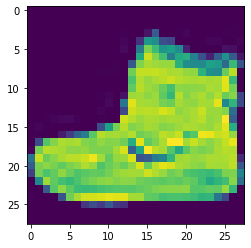

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.4989
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3740
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3359
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3110
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2945


In [11]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3551


0.35514966825246813

In [12]:
classifications = model.predict(test_images)

print(classifications[0])

[2.8492375e-06 6.0696031e-08 1.1498990e-06 1.5131602e-07 5.0895073e-06
 2.2734063e-02 3.4767076e-05 2.8721614e-02 1.9273941e-06 9.4849831e-01]


In [13]:
print(test_labels[0])

9


In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs = 15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2027
Epoch 2/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0997
Epoch 3/15
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0714
Epoch 4/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0550
Epoch 5/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0470
Epoch 6/15
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0383
Epoch 7/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0343
Epoch 8/15
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0321
Epoch 9/15
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0301
Epoch 10/15
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0275
Epoch 11/15
60

In [0]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.02):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2304, activation=tf.nn.relu),
  tf.keras.layers.Dense(600, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=65, callbacks=[callbacks])


1.15.0
Train on 60000 samples
Epoch 1/65
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4797 - acc: 0.8241
Epoch 2/65
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3646 - acc: 0.8658
Epoch 3/65
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3275 - acc: 0.8799
Epoch 4/65
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3020 - acc: 0.8884
Epoch 5/65
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2817 - acc: 0.8936
Epoch 6/65
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2666 - acc: 0.8994
Epoch 7/65
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2585 - acc: 0.9036
Epoch 8/65
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2428 - acc: 0.9086
Epoch 9/65
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2352 - acc: 0.9112
Epoch 10/65
60000/60000 [===========================

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.8069 - acc: 0.8952

Test accuracy: 0.8952
